# Основни микроикономически постановки и макроикономическите им следствия

## Оптимален избор и потребителско търсене: предпочитания на Cobb-Douglas

Функция на полезност:

$$U(x_1,x_2) = x_1^\alpha x_2^\beta, \qquad \alpha,\beta \in (0,1)$$

Бюджетно ограничение:

$$p_1x_1+p_2x_2 = I, \qquad p_1,p_2,I > 0$$

Стандартната задача на потребителя е да се максимизира функцията на полезност при бюджетното ограничение.

Решение:

$$x^*_1 = \frac{\alpha}{\alpha+\beta}\frac{ I}{p_1}, \qquad x^*_2 = \frac{\beta}{\alpha+\beta}\frac{ I}{p_2}$$

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
def dem_fun_1(p1,p2,I,alpha,beta):
    return alpha*I/((alpha+beta)*p1)

def dem_fun_2(p1,p2,I,alpha,beta):
    return beta*I/((alpha+beta)*p2)

In [5]:
p1 = 1
p2 = 1.5
alpha = 1/3
beta = 1-alpha

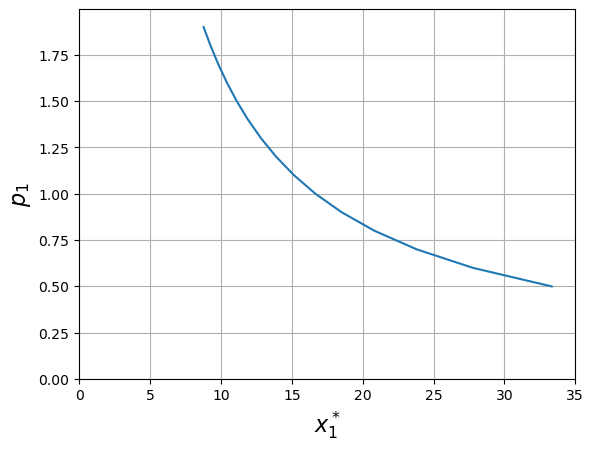

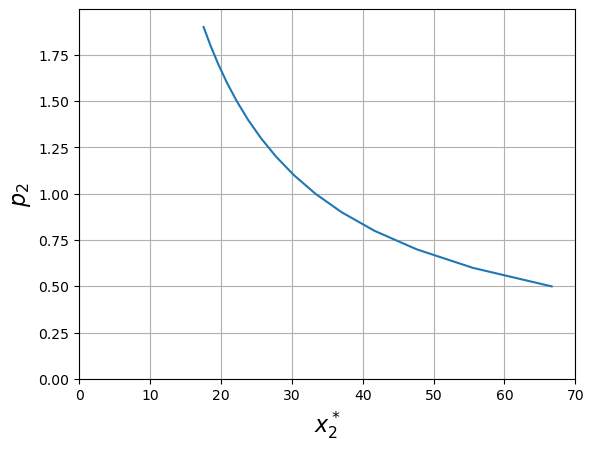

In [6]:
pvec = np.arange(0.5,2,0.1)
I=50

x1 = dem_fun_1(pvec,p2,I,alpha,beta)
plt.plot(x1, pvec)
plt.xlim(0,max(x1)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$x^*_1$",fontsize = 16)
plt.grid(True)
plt.show()

x2 = dem_fun_2(p1,pvec,I,alpha,beta)
plt.plot(x2, pvec)
plt.xlim(0,max(x2)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$x^*_2$",fontsize = 16)
plt.grid(True)
plt.show()

In [7]:
consumers = [{"nr":500, "I":50},
             {"nr":300, "I":100},
             {"nr":20, "I":1000}]

In [8]:

def agg_dem_1(consumers, p1,p2,alpha,beta):
    x1_agg = 0
    for income_group in consumers:
        x1_agg += income_group["nr"]*dem_fun_1(p1,p2,income_group["I"],alpha, beta)
    return x1_agg

def agg_dem_2(consumers, p1,p2,alpha,beta):
    x2_agg = 0
    for income_group in consumers:
        x2_agg += income_group["nr"]*dem_fun_2(p1,p2,income_group["I"],alpha, beta)
    return x2_agg


def repr_consumer_population(consumers):
    Itot = nr_tot = 0
    for income_group in consumers:
        Itot += income_group["nr"]*income_group["I"]
        nr_tot += income_group["nr"]
    return [{"nr":nr_tot, "I":Itot/nr_tot}]

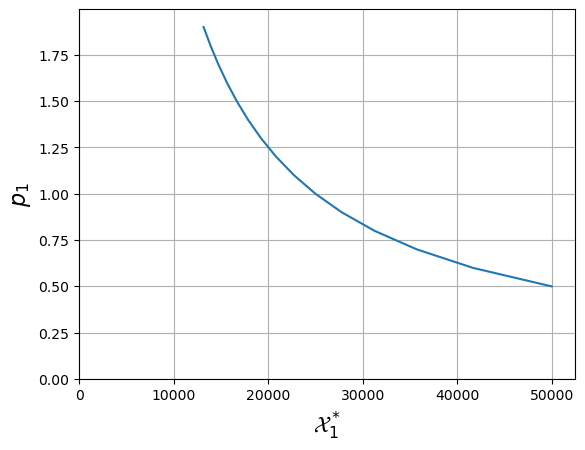

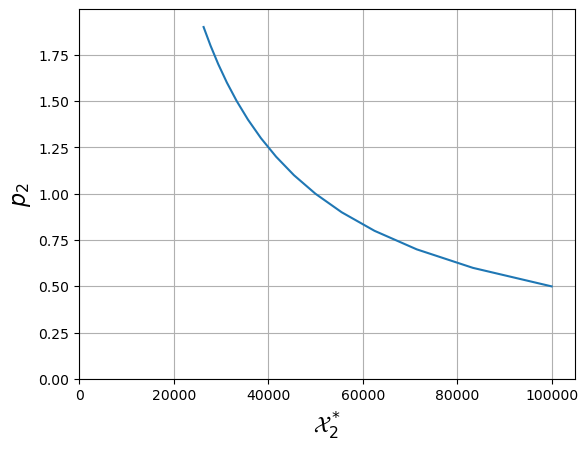

In [9]:
x1_agg = agg_dem_1(consumers,pvec,p2,alpha,beta)
plt.plot(x1_agg, pvec)
plt.xlim(0,max(x1_agg)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_1$",fontsize = 16)
plt.grid(True)
plt.show()

x2_agg = agg_dem_2(consumers,p1,pvec,alpha,beta)
plt.plot(x2_agg, pvec)
plt.xlim(0,max(x2_agg)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_2$",fontsize = 16)
plt.grid(True)
plt.show()

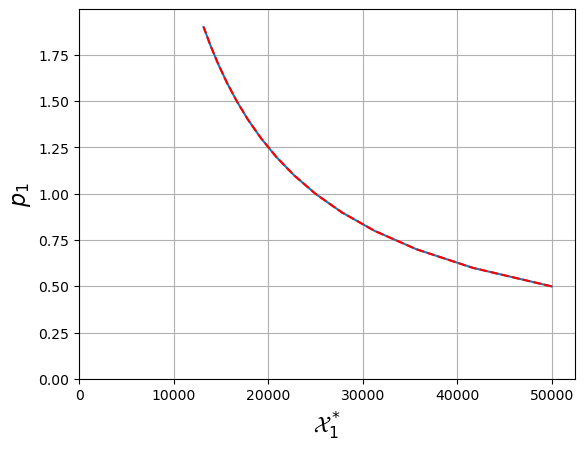

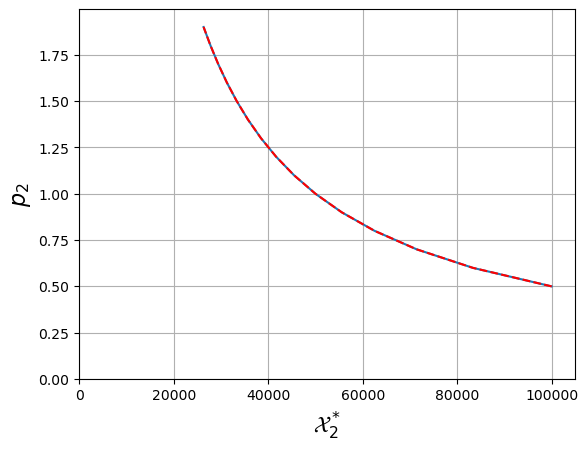

In [10]:
x1_agg = agg_dem_1(consumers,pvec,p2,alpha,beta)
x1_agg_repr = agg_dem_1(repr_consumer_population(consumers),pvec,p2,alpha,beta)

plt.plot(x1_agg, pvec)
plt.plot(x1_agg_repr, pvec, "r--")
plt.xlim(0,max(x1_agg)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_1$",fontsize = 16)
plt.grid(True)
plt.show()

x2_agg = agg_dem_2(consumers,p1,pvec,alpha,beta)
x2_agg_repr = agg_dem_2(repr_consumer_population(consumers),p1,pvec,alpha,beta)

plt.plot(x2_agg, pvec)
plt.plot(x2_agg_repr, pvec, "r--")
plt.xlim(0,max(x2_agg)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_2$",fontsize = 16)
plt.grid(True)
plt.show()



Визуално кривите на съвкупно търсене на съответните стоки съвпадат. Така ли е наистина?

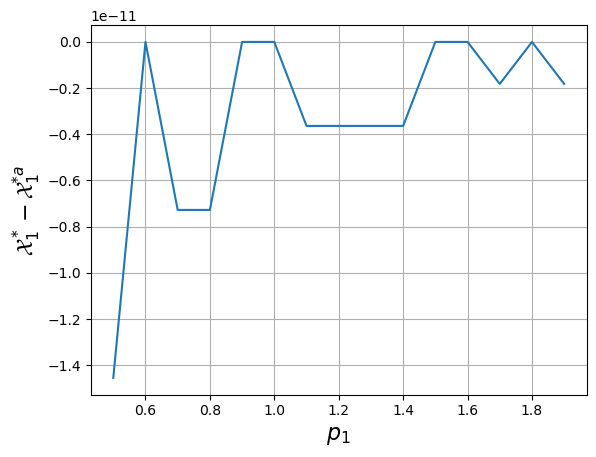

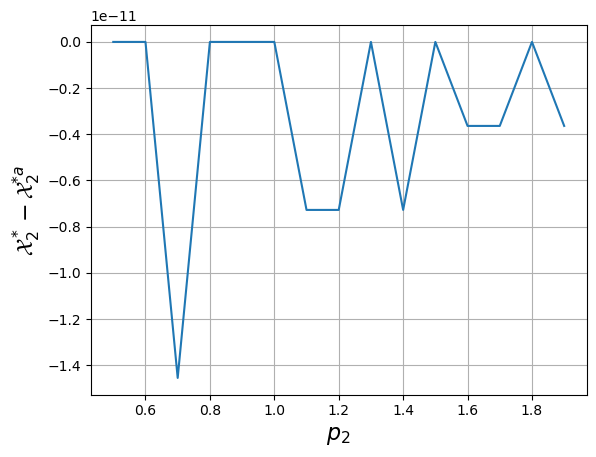

In [12]:

plt.plot(pvec, x1_agg-x1_agg_repr)
plt.xlabel(r"$p_1$",fontsize = 16)
plt.ylabel(r"$\mathcal{X}^*_1 - \mathcal{X}^{*a}_1$",fontsize = 16)
plt.grid(True)
plt.show()

plt.plot(pvec, x2_agg-x2_agg_repr)
plt.xlabel(r"$p_2$",fontsize = 16)
plt.ylabel(r"$\mathcal{X}^*_2 - \mathcal{X}^{*a}_2$",fontsize = 16)
plt.grid(True)
plt.show()




## Оптимален избор и потребителско търсене: предпочитания на Stone-Geary

Функция на полезност:

$$U(x_1,x_2) = (x_1-\bar{x}_1)^\alpha (x_2-\bar{x}_2)^\beta $$

$$\alpha,\beta \in (0,1), \quad \bar{x}_1, \bar{x}_2 > 0$$

Бюджетно ограничение:

$$p_1x_1+p_2x_2 = I, \qquad p_1,p_2,I > 0$$

Отново стандартна задача за максимизиране на полезност.

Бележки:
- $\bar{x}_1$ и $\bar{x}_2$ се интерпретират като минимално необходимо потребление
- За да имат смисъл решенията, дадени по-долу, трябва да е изпълнено $I-p_1\bar{x}_1 -p_2\bar{x}_2 \geq 0$

Решение:

$$x^*_1 = \bar{x}_1 + \frac{\alpha}{\alpha+\beta} \frac{I-p_1\bar{x}_1 -p_2\bar{x}_2}{p_1}, \qquad x^*_2 = \bar{x}_2 + \frac{\beta}{\alpha+\beta} \frac{I-p_1\bar{x}_1 -p_2\bar{x}_2}{p_2} $$


In [14]:
def dem_fun_1_SG(p1,p2,I,alpha,beta,x1bar,x2bar):
    return x1bar + (alpha/(alpha+beta)) * ((I-p1*x1bar-p2*x2bar)/p1)

def dem_fun_2_SG(p1,p2,I,alpha,beta,x1bar,x2bar):
    return x2bar + (beta/(alpha+beta)) * ((I-p1*x1bar-p2*x2bar)/p2)

In [15]:
p1 = 1
p2 = 1.5
alpha = 1/3
beta = 1-alpha
x1bar = 20
x2bar = 10

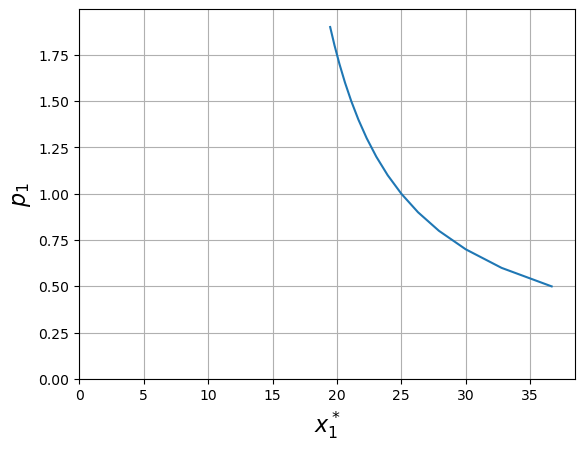

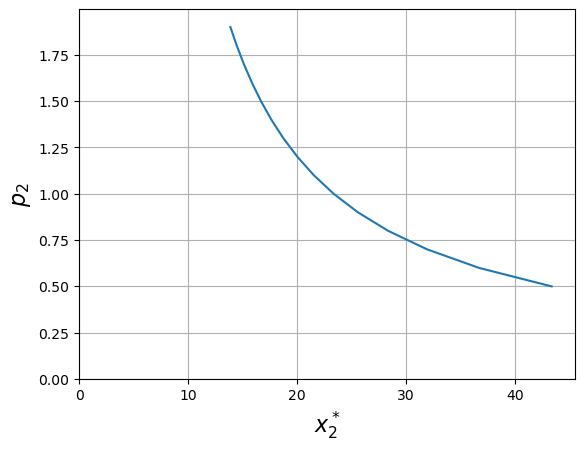

In [16]:
pvec = np.arange(0.5,2,0.1)
I=50

x1 = dem_fun_1_SG(pvec,p2,I,alpha,beta,x1bar,x2bar)
plt.plot(x1, pvec)
plt.xlim(0,max(x1)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$x^*_1$",fontsize = 16)
plt.grid(True)
plt.show()

x2 = dem_fun_2_SG(p1,pvec,I,alpha,beta,x1bar,x2bar)
plt.plot(x2, pvec)
plt.xlim(0,max(x2)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$x^*_2$",fontsize = 16)
plt.grid(True)
plt.show()

In [17]:
consumers = [{"nr":500, "I":50},
             {"nr":300, "I":100},
             {"nr":20, "I":1000}]

In [18]:

def agg_dem_1_SG(consumers, p1,p2,alpha,beta,x1bar,x2bar):
    x1_agg = 0
    for income_group in consumers:
        x1_agg += income_group["nr"]*dem_fun_1_SG(p1,p2,income_group["I"],alpha, beta,x1bar,x2bar)
    return x1_agg

def agg_dem_2_SG(consumers, p1,p2,alpha,beta,x1bar,x2bar):
    x2_agg = 0
    for income_group in consumers:
        x2_agg += income_group["nr"]*dem_fun_2_SG(p1,p2,income_group["I"],alpha, beta,x1bar,x2bar)
    return x2_agg


def repr_consumer_population(consumers):
    Itot = nr_tot = 0
    for income_group in consumers:
        Itot += income_group["nr"]*income_group["I"]
        nr_tot += income_group["nr"]
    return [{"nr":nr_tot, "I":Itot/nr_tot}]

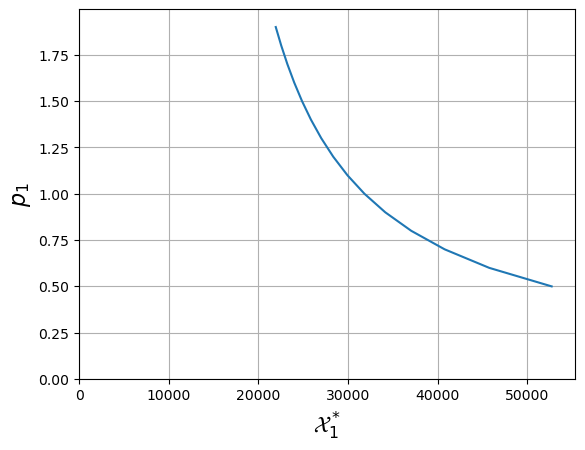

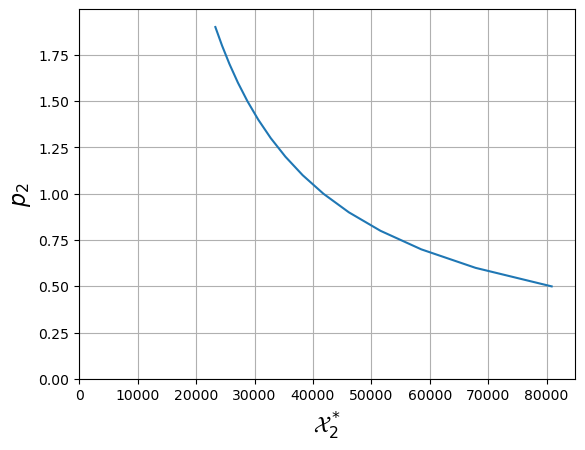

In [19]:
x1_agg_SG = agg_dem_1_SG(consumers,pvec,p2,alpha,beta,x1bar,x2bar)
plt.plot(x1_agg_SG, pvec)
plt.xlim(0,max(x1_agg_SG)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_1$",fontsize = 16)
plt.grid(True)
plt.show()

x2_agg_SG = agg_dem_2_SG(consumers,p1,pvec,alpha,beta,x1bar,x2bar)
plt.plot(x2_agg_SG, pvec)
plt.xlim(0,max(x2_agg_SG)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_2$",fontsize = 16)
plt.grid(True)
plt.show()

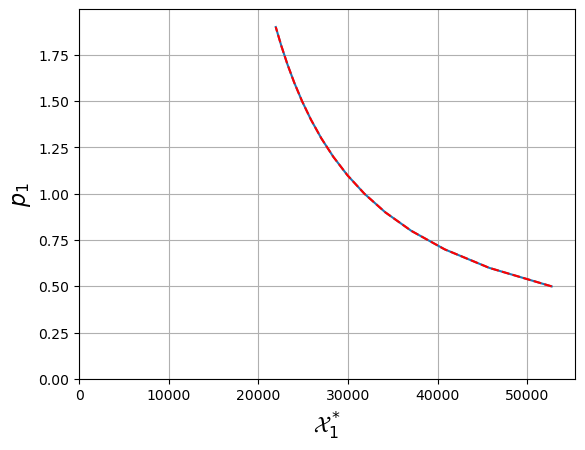

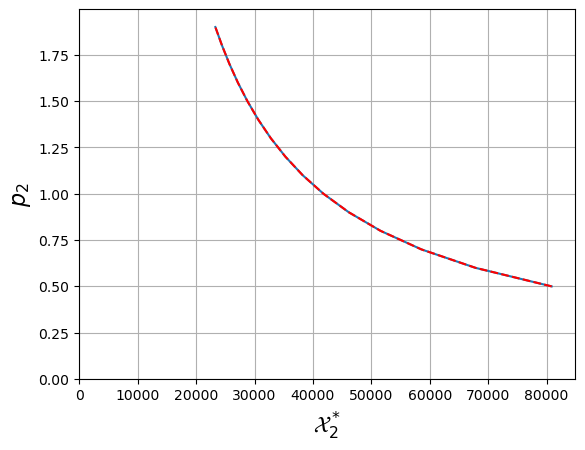

In [20]:
x1_agg_SG = agg_dem_1_SG(consumers,pvec,p2,alpha,beta,x1bar,x2bar)
x1_agg_SG_repr = agg_dem_1_SG(repr_consumer_population(consumers),pvec,p2,alpha,beta,x1bar,x2bar)

plt.plot(x1_agg_SG, pvec)
plt.plot(x1_agg_SG_repr, pvec, "r--")
plt.xlim(0,max(x1_agg_SG)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_1$",fontsize = 16)
plt.grid(True)
plt.show()


x2_agg_SG = agg_dem_2_SG(consumers,p1,pvec,alpha,beta,x1bar,x2bar)
x2_agg_SG_repr = agg_dem_2_SG(repr_consumer_population(consumers),p1,pvec,alpha,beta,x1bar,x2bar)

plt.plot(x2_agg_SG, pvec)
plt.plot(x2_agg_SG_repr, pvec, "r--")
plt.xlim(0,max(x2_agg_SG)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_2$",fontsize = 16)
plt.grid(True)
plt.show()



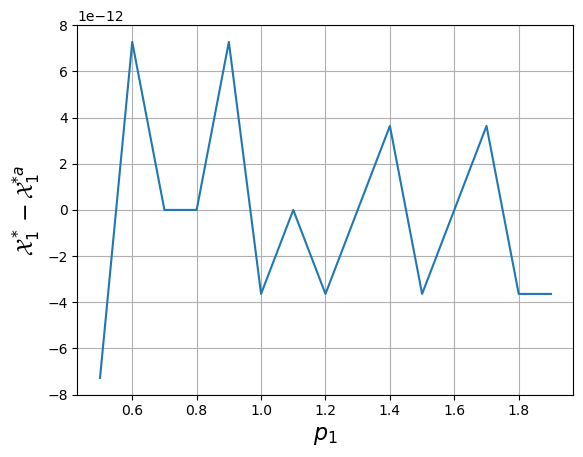

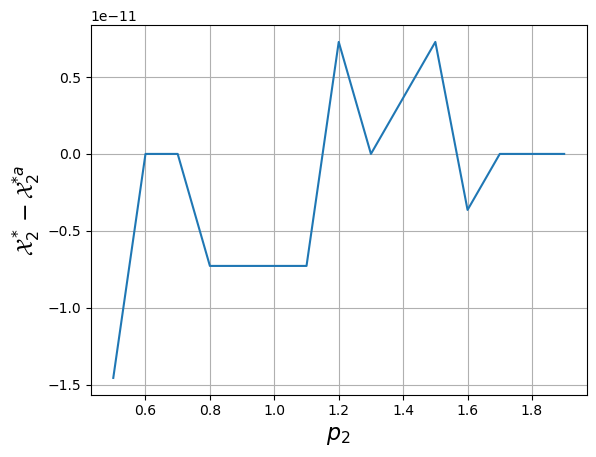

In [21]:

plt.plot(pvec, x1_agg_SG-x1_agg_SG_repr)
plt.xlabel(r"$p_1$",fontsize = 16)
plt.ylabel(r"$\mathcal{X}^*_1 - \mathcal{X}^{*a}_1$",fontsize = 16)
plt.grid(True)
plt.show()

plt.plot(pvec, x2_agg_SG-x2_agg_SG_repr)
plt.xlabel(r"$p_2$",fontsize = 16)
plt.ylabel(r"$\mathcal{X}^*_2 - \mathcal{X}^{*a}_2$",fontsize = 16)
plt.grid(True)
plt.show()




## Оптимален избор и потребителско търсене: транслог предпочитания

Функция на полезност:

$$U(x_1, x_2) = \exp\left( a_0 + a_1 \ln x_1 + a_2 \ln x_2 + \frac{b_{11}}{2} (\ln x_1)^2 + \frac{b_{22}}{2} (\ln x_2)^2 + b_{12} \ln x_1 \ln x_2 \right)
$$

$$a_1,a_2>0,\quad b_{11},b_{22}<0$$

Бюджетно ограничение:

$$p_1x_1+p_2x_2 = I, \qquad p_1,p_2,I > 0$$

Стандартна задача за максимизиране на полезност.

In [23]:
import numpy as np
from scipy.optimize import minimize

def translog_utility(x, a0, a1, a2, b11, b22, b12):
    x1, x2 = x
    logx1 = np.log(x1)
    logx2 = np.log(x2)
    util = a0 + a1 * logx1 + a2 * logx2 + 0.5 * b11 * logx1**2 + 0.5 * b22 * logx2**2 + b12 * logx1 * logx2
    return util

def objective(x, a0, a1, a2, b11, b22, b12):
    return -translog_utility(x, a0, a1, a2, b11, b22, b12)

def optimize_translog(p1, p2, I, a0, a1, a2, b11, b22, b12):
    x0 = np.array([I / (2 * p1), I / (2 * p2)])
    cons = {'type': 'eq', 'fun': lambda x: p1 * x[0] + p2 * x[1] - I}
    bounds = ((1e-8, None), (1e-8, None))
    
    result = minimize(
        objective,
        x0,
        args=(a0, a1, a2, b11, b22, b12),
        method='SLSQP',
        constraints=cons,
        bounds=bounds
    )
    
    if not result.success:
        raise ValueError("Optimization failed: " + result.message)
    
    return result.x

def dem_fun_1_tlog(p1, p2, I, a0, a1, a2, b11, b22, b12):
    x = optimize_translog(p1, p2, I, a0, a1, a2, b11, b22, b12)
    return x[0]

def dem_fun_2_tlog(p1, p2, I, a0, a1, a2, b11, b22, b12):
    x = optimize_translog(p1, p2, I, a0, a1, a2, b11, b22, b12)
    return x[1]

In [24]:

p1 = 1.0
p2 = 2.0
I = 100.0
a0 = 0.0
a1 = 1.0
a2 = 1.0
b11 = -0.2
b22 = -0.3
b12 = 2

In [25]:
consumers = [{"nr":500, "I":50},
             {"nr":300, "I":100},
             {"nr":20, "I":1000}]

In [26]:
vec_dem_fun_1_tlog = np.vectorize(dem_fun_1_tlog)
vec_dem_fun_2_tlog = np.vectorize(dem_fun_2_tlog)

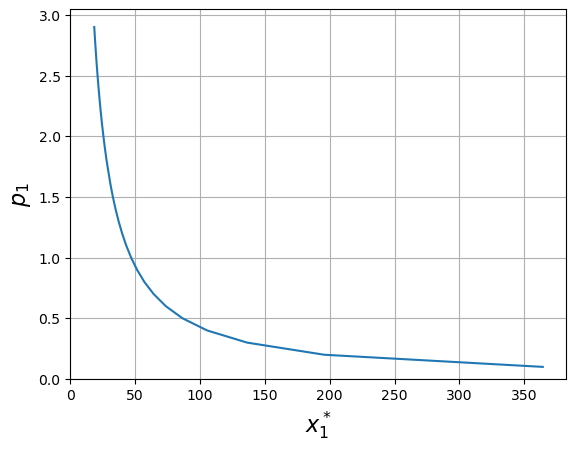

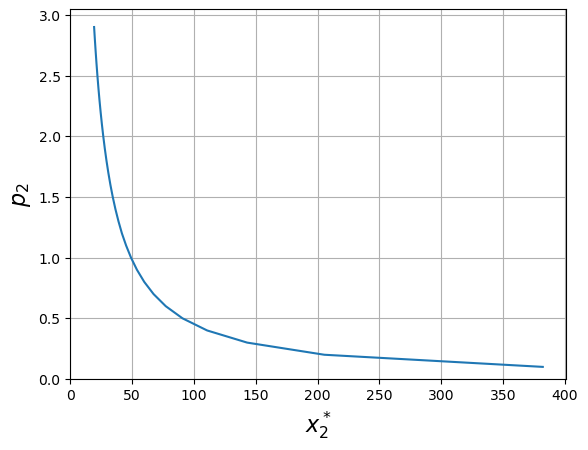

In [27]:
pvec = np.arange(0.1,3,0.1)

x1 = vec_dem_fun_1_tlog(pvec, p2, I, a0, a1, a2, b11, b22, b12)

plt.plot(x1, pvec)
plt.xlim(0,max(x1)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$x^*_1$",fontsize = 16)
plt.grid(True)
plt.show()

x2 = vec_dem_fun_2_tlog(p1, pvec, I, a0, a1, a2, b11, b22, b12)

plt.plot(x2, pvec)
plt.xlim(0,max(x2)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$x^*_2$",fontsize = 16)
plt.grid(True)
plt.show()


In [28]:

def agg_dem_1_tlog(consumers, p1,p2, a0, a1, a2, b11, b22, b12):
    x1_agg = 0
    for income_group in consumers:
        x1_agg += income_group["nr"]*vec_dem_fun_1_tlog(p1,p2,income_group["I"], a0, a1, a2, b11, b22, b12)  
    return x1_agg

def agg_dem_2_tlog(consumers, p1,p2,a0, a1, a2, b11, b22, b12):
    x2_agg = 0
    for income_group in consumers:
        x2_agg += income_group["nr"]*vec_dem_fun_2_tlog(p1,p2,income_group["I"],a0, a1, a2, b11, b22, b12)
    return x2_agg


def repr_consumer_population(consumers):
    Itot = nr_tot = 0
    for income_group in consumers:
        Itot += income_group["nr"]*income_group["I"]
        nr_tot += income_group["nr"]
    return [{"nr":nr_tot, "I":Itot/nr_tot}]

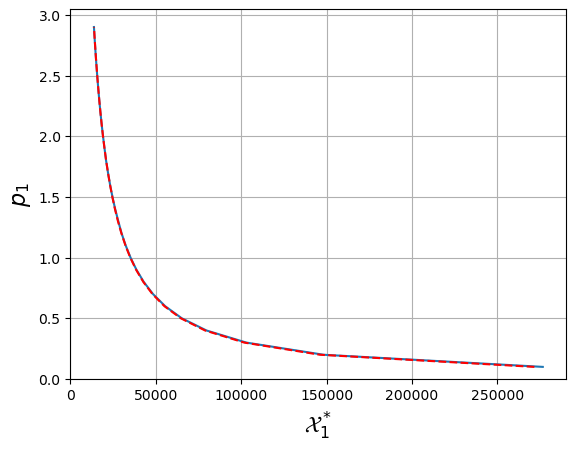

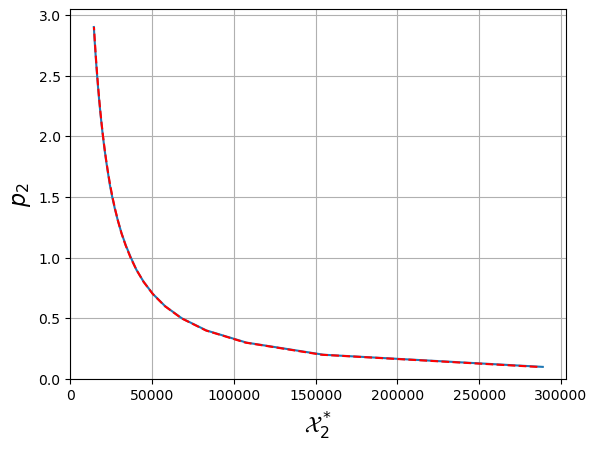

In [29]:
x1_agg_tlog = agg_dem_1_tlog(consumers, pvec,p2,a0, a1, a2, b11, b22, b12)
x1_agg_tlog_repr = agg_dem_1_tlog(repr_consumer_population(consumers),pvec,p2,a0, a1, a2, b11, b22, b12)

plt.plot(x1_agg_tlog, pvec)
plt.plot(x1_agg_tlog_repr, pvec, "r--")
plt.xlim(0,max(x1_agg_tlog)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_1$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_1$",fontsize = 16)
plt.grid(True)
plt.show()


x2_agg_tlog = agg_dem_2_tlog(consumers, p1, pvec,a0, a1, a2, b11, b22, b12)
x2_agg_tlog_repr = agg_dem_2_tlog(repr_consumer_population(consumers),p1, pvec,a0, a1, a2, b11, b22, b12)

plt.plot(x2_agg_tlog, pvec)
plt.plot(x2_agg_tlog_repr, pvec, "r--")
plt.xlim(0,max(x2_agg_tlog)*1.05)
plt.ylim(0,max(pvec)*1.05)
plt.ylabel(r"$p_2$",fontsize = 16)
plt.xlabel(r"$\mathcal{X}^*_2$",fontsize = 16)
plt.grid(True)
plt.show()

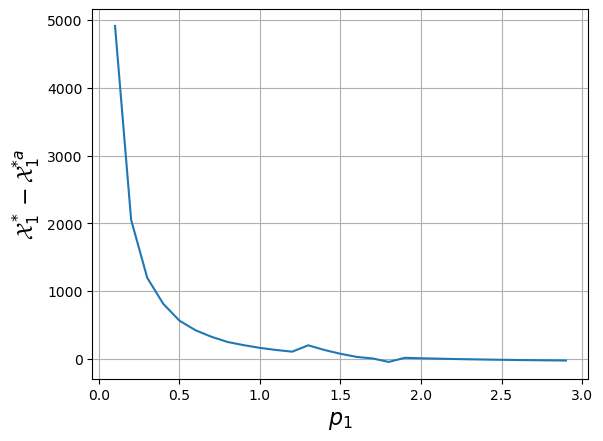

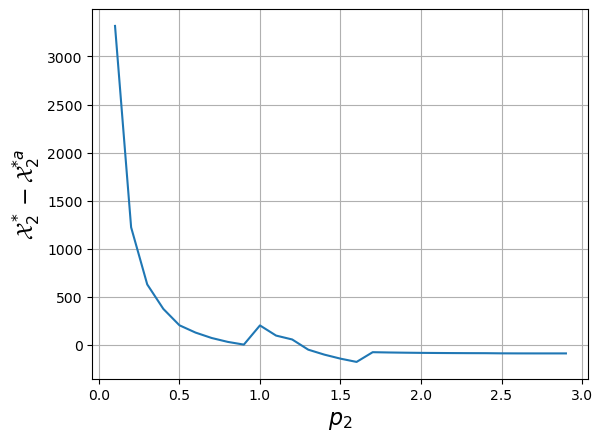

In [30]:

plt.plot(pvec, x1_agg_tlog-x1_agg_tlog_repr)
plt.xlabel(r"$p_1$",fontsize = 16)
plt.ylabel(r"$\mathcal{X}^*_1 - \mathcal{X}^{*a}_1$",fontsize = 16)
plt.grid(True)
plt.show()

plt.plot(pvec, x2_agg_tlog-x2_agg_tlog_repr)
plt.xlabel(r"$p_2$",fontsize = 16)
plt.ylabel(r"$\mathcal{X}^*_2 - \mathcal{X}^{*a}_2$",fontsize = 16)
plt.grid(True)
plt.show()




## Фирми и максимизиране на печалбата (1)

Печалба:

$$\Pi = pq - TC(q)$$

Цената $p$ се приема за дадена.

$$\frac{d}{dq}\Pi = p - TC'(q) = p- MC(q) = 0 \quad \Rightarrow \quad MC(q) = p$$

Нека $$TC(q)=aq^2+c, \quad a,c>0.$$

Тогава условието $MC=p$ дава 

$$q = \frac{p}{2a}.$$

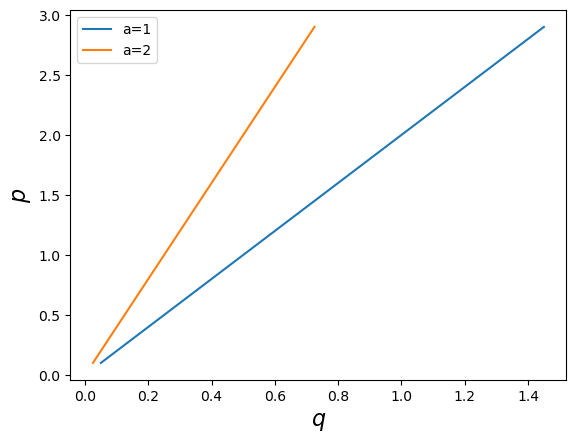

In [32]:
a_1 = 1
q1 = pvec/(2*a_1)
a_2 = 2
q2 = pvec/(2*a_2)

plt.plot(q1, pvec,label=f"a={a_1}")
plt.plot(q2, pvec,label=f"a={a_2}")
plt.xlabel(r"$q$",fontsize = 16)
plt.ylabel(r"$p$",fontsize = 16)
plt.legend()
plt.show()

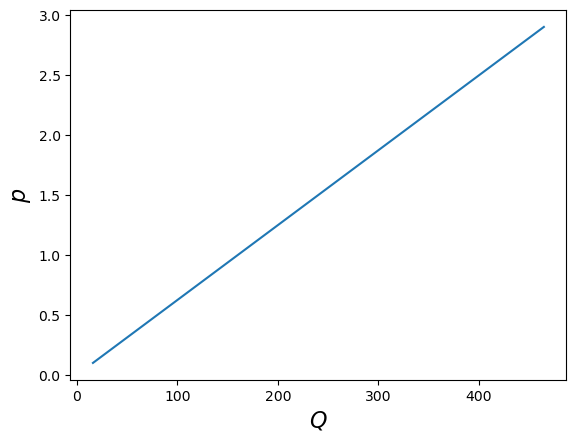

In [33]:
avec = [1, 1.3, 1.5]
nr = [100, 200, 100]

qtot = np.zeros_like(pvec)
for a,n in zip(avec,nr):
    qtot += n * pvec/(2*a)

plt.plot(qtot, pvec)
plt.xlabel(r"$Q$",fontsize = 16)
plt.ylabel(r"$p$",fontsize = 16)
plt.show()

## Фирми и максимизиране на печалбата (2)

Производствена технология:

$$ q(L) = AL^\gamma, \qquad A>0,~\gamma \in (0,1)$$

Печалба:

$$\Pi = p q(L) - WL$$

Цената $p$ и заплатата $W$ се приемат за дадени.

$$ \frac{d}{dL}\Pi = p A \gamma L^{\gamma-1} - W = 0 \qquad \Rightarrow \qquad L = \left[ \frac{p A \gamma}{W} \right]^{\frac{1}{1-\gamma}} $$

Тогава

$$q^* = A \left[ \frac{p A \gamma}{W} \right]^{\frac{\gamma}{1-\gamma}} $$

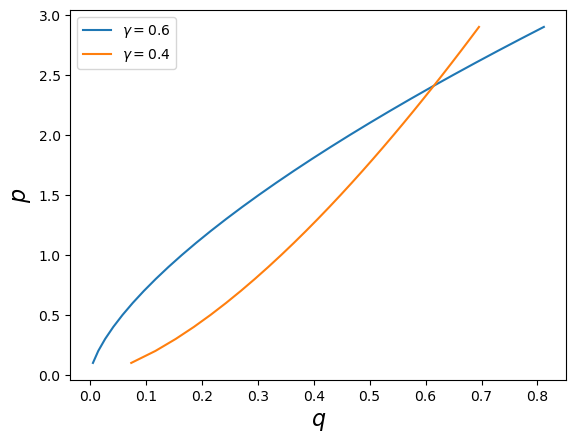

In [35]:
A = 1
W = 2
gamma_1 = 0.6
gamma_2 = 0.4

q1 = A*(pvec*A*gamma_1/W)**(gamma_1/(1-gamma_1))
q2 = A*(pvec*A*gamma_2/W)**(gamma_2/(1-gamma_2))

plt.plot(q1, pvec,label=f"$\\gamma={gamma_1}$")
plt.plot(q2, pvec,label=f"$\\gamma={gamma_2}$")
plt.xlabel(r"$q$",fontsize = 16)
plt.ylabel(r"$p$",fontsize = 16)
plt.legend()
plt.show()

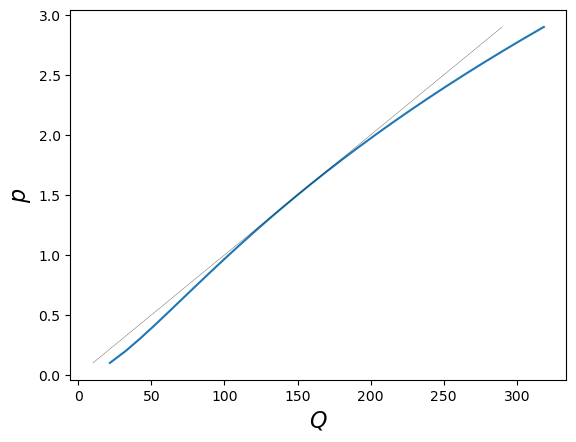

In [36]:
gvec = [0.3, 0.5, 0.7]
nr = [100, 200, 100]

qtot = np.zeros_like(pvec)
for g,n in zip(gvec,nr):
    qtot += n * A*(pvec*A*g/W)**(g/(1-g))

plt.plot(qtot, pvec)
plt.plot(pvec*100, pvec, 'k', linewidth = 0.2)
plt.xlabel(r"$Q$",fontsize = 16)
plt.ylabel(r"$p$",fontsize = 16)
plt.show()

## Определяне на пазарните цени

В изложението дотук домакинствата приемаха цените за дадени, а фирмите от своя страна правеха същото. Как тогава се определят съответните цени?

В стандартните макроикономически модели това става от условия за изравняване на търсене и предлагане.

Нека стока 1 се произвежда от $m_1$ на брой еднакви фирми, всяка от които се описва с оптималното предлагане $q^* = \frac{p_1}{2a_1}$. Аналогично, стока 2 се произвежда от $m_2$ на брой еднакви фирми, всяка от които се описва с оптималното предлагане $q^* = \frac{p_2}{2a_2}$.

Тогава общото предлагане на стоките ще бъде 

$$AS_j(p_j) = m_j \frac{p_j}{2 a_j},\quad j=1,2.$$

Нека също така имаме $k$ групи домакинства с предпочитания от тип Cobb-Douglas, различаващи се по дохода си. Броят на домакинствата с доход $I_i$ е $n_i$, където $i=1,\ldots,k$.

Тогава общото търсене на стоки 1 и 2 ще бъде съответно

$$AD_1(p_1) = \frac{\alpha}{\alpha+\beta} \frac{\sum_{i=1}^k n_i I_i}{p_1}, \quad AD_2(p_2) = \frac{\beta}{\alpha+\beta} \frac{\sum_{i=1}^k n_i I_i}{p_2}.$$

Определянето на цената става от условия за изравняване на общото търсене и общото предлагане: 

$$AS_j(p_j) = AD_j(p_j),~j=1,2.$$

Така получаваме

$$p_1 = \left[ \frac{2a_1}{m_1} \frac{\alpha}{\alpha+\beta} \sum_{i=1}^k n_i I_i \right]^{1/2}, \qquad p_2 = \left[ \frac{2a_2}{m_2} \frac{\beta}{\alpha+\beta} \sum_{i=1}^k n_i I_i \right]^{1/2}.$$